In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from load_results import load_setup, load_setup_1, load_setup_2, PARAM_COLUMNS, RESULT_COLUMNS, FITNESS_FUNCTIONS

%matplotlib inline

In [2]:
df = load_setup_1()
df.head()

,fitness_function,use_constraint,constraint_handling_method,constraint,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r,fitness,optimum,iterations,optimum_reached,iterations_to_opt
0,Booth's function,False,-,-,13,5,0.5,1.5,0.1,-,0.979372,1.0,500.0,0.000000,8.500000
1,Booth's function,False,-,-,13,5,0.5,1.5,0.5,-,0.998115,1.0,500.0,0.333333,19.833333
2,Booth's function,False,-,-,13,5,0.5,1.5,0.9,-,1.000000,1.0,500.0,1.000000,47.000000
3,Booth's function,False,-,-,13,5,1.0,1.0,0.1,-,0.980398,1.0,500.0,0.000000,18.000000
4,Booth's function,False,-,-,13,5,1.0,1.0,0.5,-,0.997502,1.0,500.0,0.166667,92.166667


In [3]:
df[RESULT_COLUMNS].describe()

,fitness,optimum_reached,iterations_to_opt
count,2052.000000,2052.000000,2052.000000
mean,0.896376,0.550383,38.755653
std,0.154708,0.415444,44.240205
min,0.484441,0.000000,0.500000
25%,0.890022,0.166667,10.000000
50%,0.949454,0.600000,22.000000
75%,1.000000,1.000000,48.708333
max,1.000000,1.000000,371.000000


In [4]:
# inspect values in Experiment setup
for column in PARAM_COLUMNS:
    print(f'{column}: {df[column].unique()}')

fitness_function: ["Booth's function" 'Schwefel function' 'Shubert function']
use_constraint: [False  True]
constraint_handling_method: ['-' 'Penalty Method' 'Rejection Method']
constraint: ['-' 'Constraint 10' 'Constraint 3' 'Constraint 5']
particle_speed_limit: [13]
population_size: [ 5 10 35 80]
personal_confidence: [0.5 1.  1.5]
swarm_confidence: [1.5 1.  0.5]
particle_inertia: [0.1 0.5 0.9]
constraint_r: ['-' -2.0 -1.5 -1.0]


# Evaluation

## Population Size

### Background

* number of turtles
* higher computation effort 
* more turlte spread search space initially better

* we tested values of 5, 10, 35 and 80

### Hypothesis

* higher number of turles less iterations 
* higher number of turtles better fitness

In [6]:
df[~df.use_constraint].groupby(['fitness_function', 'population_size'])[RESULT_COLUMNS].mean()

fitness  optimum_reached  \
fitness_function  population_size                              
Booth's function  5                0.992345         0.425926   
                  10               0.997519         0.592593   
                  35               0.999944         0.844444   
                  80               1.000000         1.000000   
Schwefel function 5                0.915233         0.351852   
                  10               0.951231         0.481481   
                  35               0.987208         0.711111   
                  80               0.999541         0.888889   
Shubert function  5                0.709870         0.018519   
                  10               0.843137         0.351852   
                  35               0.994283         0.955556   
                  80               1.000000         1.000000   

                                   iterations_to_opt  
fitness_function  population_size                     
Booth's function  5                        43.574074  
                  10                       37.444444  
                  35                       16.933333  
                  80                        8.972222  
Schwefel function 5                        71.425926  
                  10                       76.481481  
                  35                       66.333333  
                  80                       40.888889  
Shubert function  5                        64.703704  
                  10                       51.148148  
                  35                       25.400000  
                  80                       15.444444

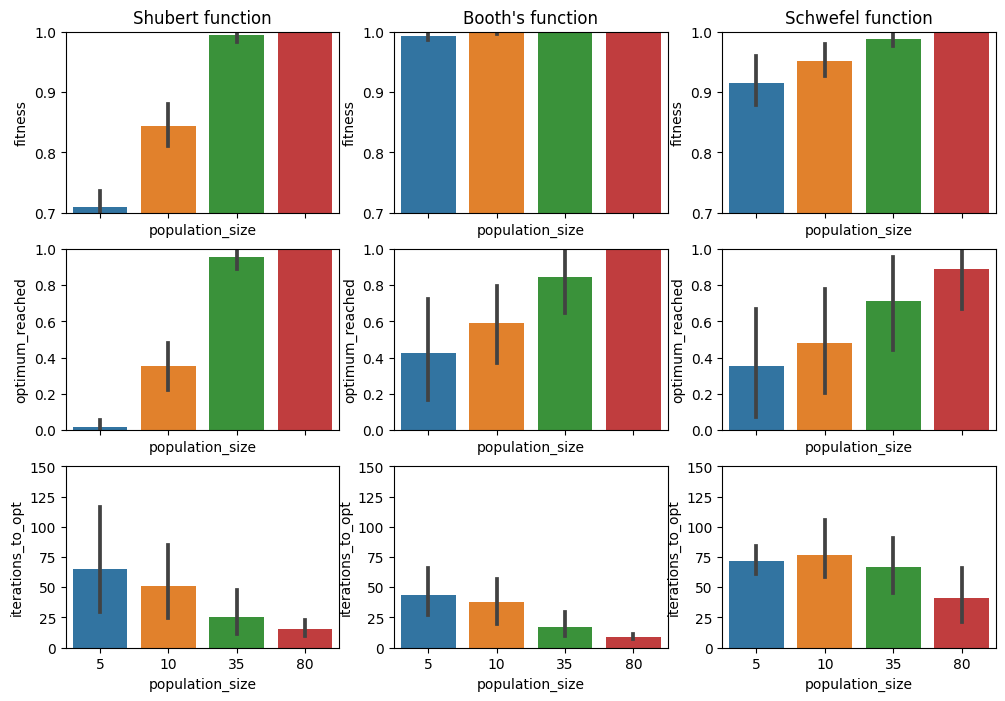

In [7]:
df_population_size = df[~df.use_constraint].reset_index()
figure, axes = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
for result_column, axe in zip(RESULT_COLUMNS, axes):
    for fitness_function, ax in zip(FITNESS_FUNCTIONS, axe):
        sns.barplot(
            data=df_population_size[df_population_size.fitness_function == fitness_function],
            x='population_size',
            y=result_column,
            ax=ax)
for ax, fitness_function in zip(axes[0], FITNESS_FUNCTIONS):
    ax.set_ylim(0.7, 1.0)
    ax.set_title(fitness_function)
for ax in axes[1]:
    ax.set_ylim(0.0, 1.0)
for ax in axes[2]:
    ax.set_ylim(0, 150)

## Shubert function

* the function has very a lot of local optimum and hard to find global optimum -> worst fitness
* higher swarm size leads to to significant better fitness 0.7 to 1.0 
* only a third of iterations needed 
* optimum always reached with high swarm size 
* optimum almost never reached with low swarm size 
* but 35 already very good

## Booth's function 

* most of the time near optimumg but optimum only reached 70% of time 
* very similar but near optimum can already be reached with fewer turtles
* easyer function thus less population needed

## Schwefel function

* many local optima but not so much as in Shubert
* same but not so drastic difference as for shubert 
* highes best 

## General 

* population size is very important for finding an optimum
* to few turtles lead to not exploring the search space sufficently 
* low population not able to relyabli find optimum for all functions 
* cannot measure computaion effort but higher for higher population